In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import defaultdict

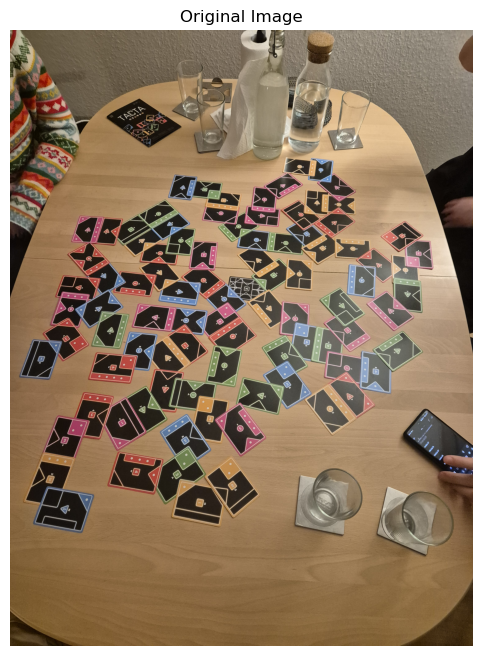

In [2]:
# Load and display the image
image_path = 'data/20251106_201644.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

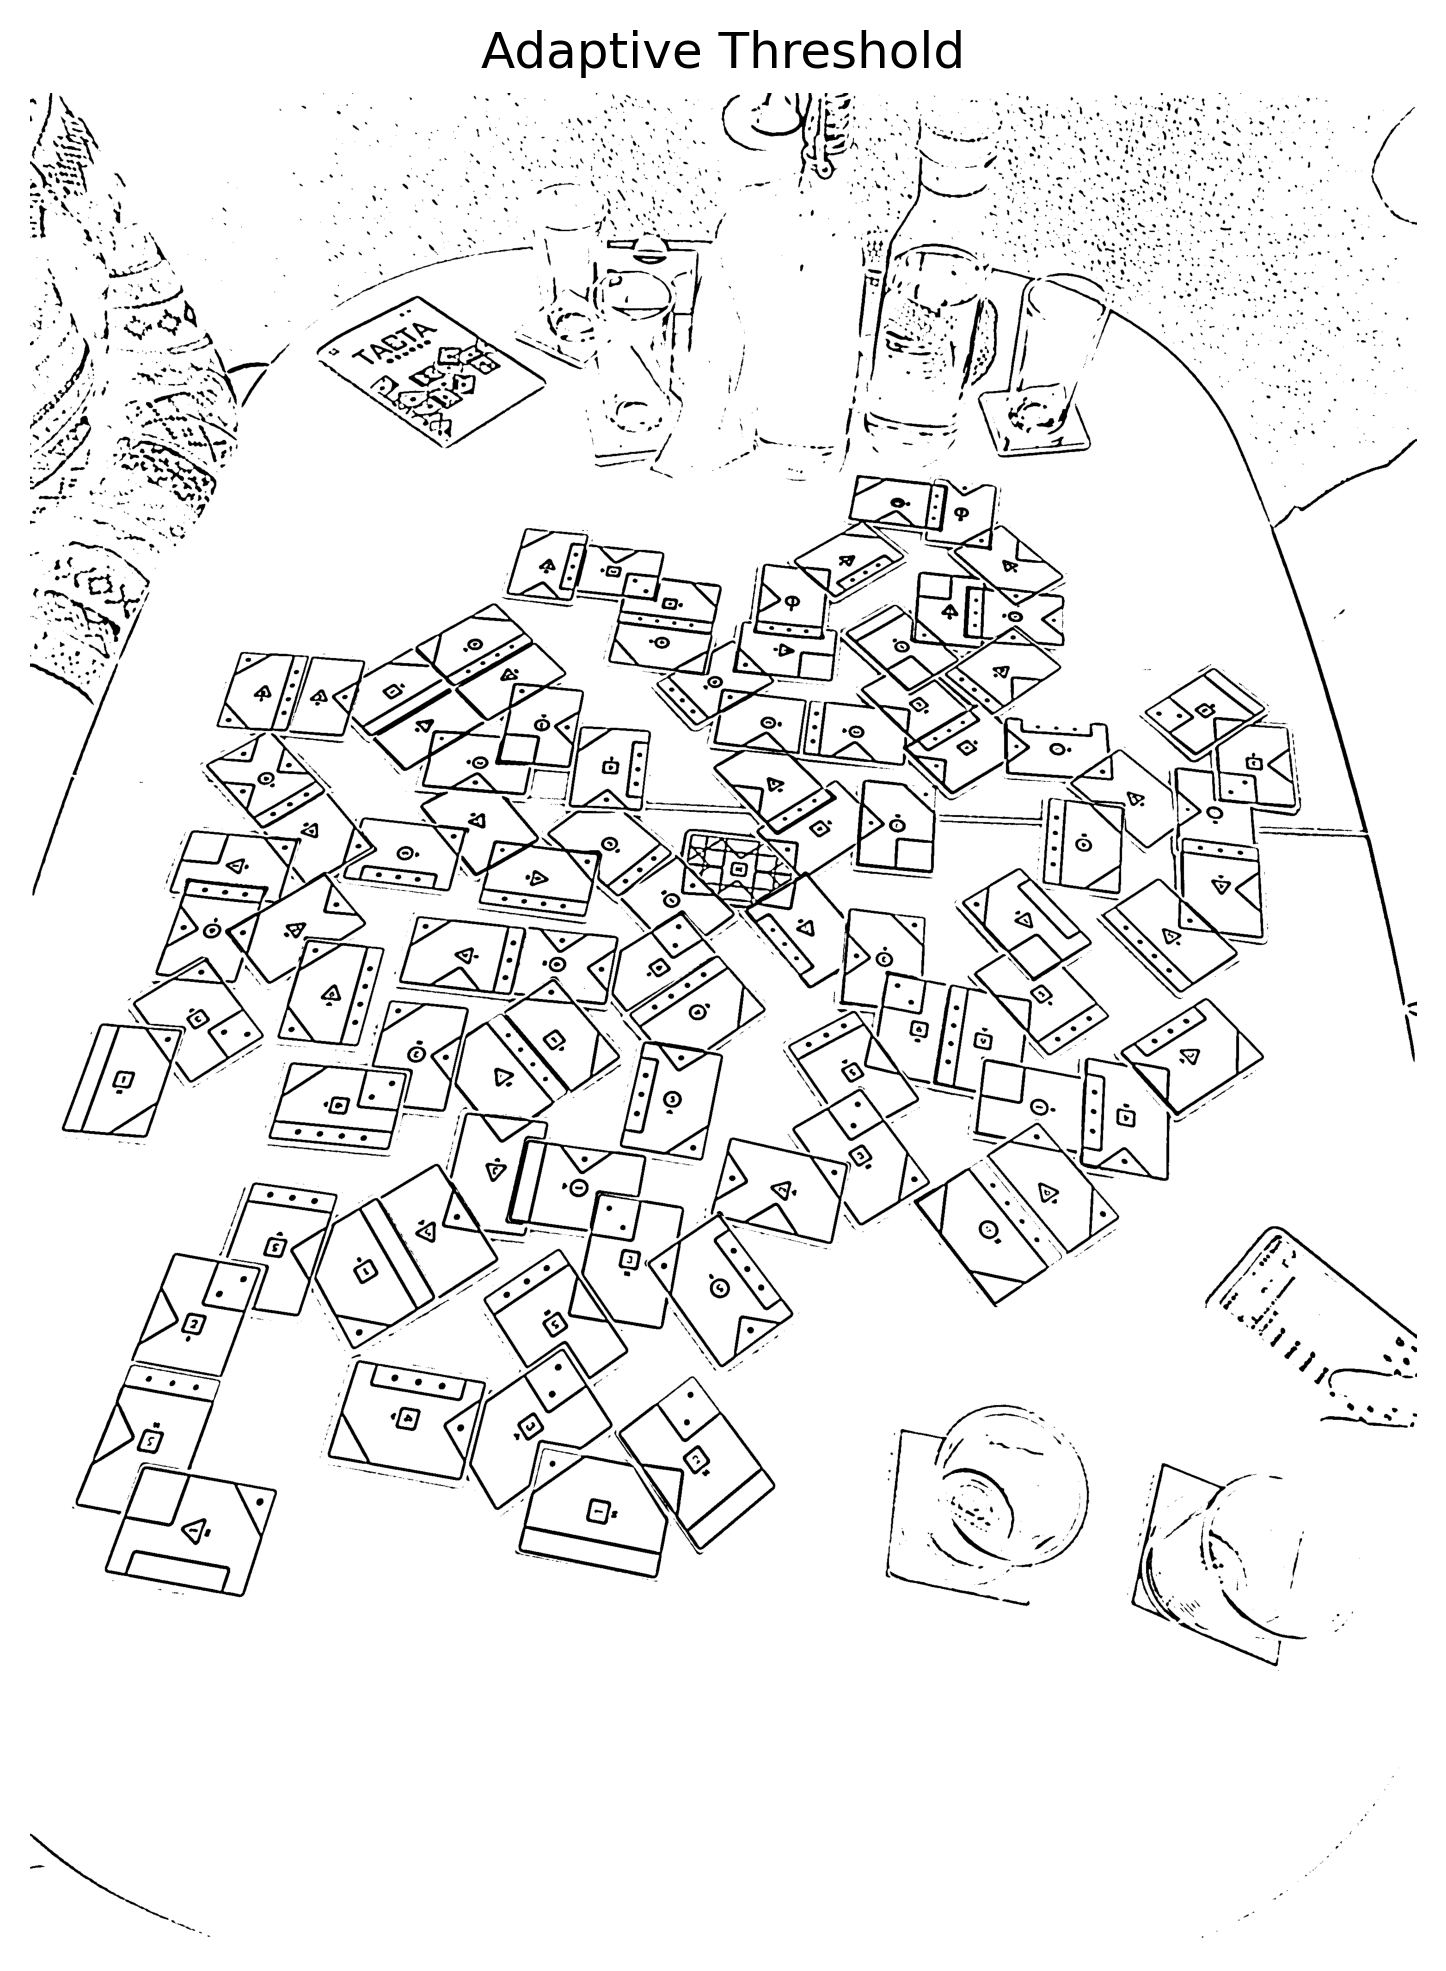

In [22]:
# Apply adaptive thresholding
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 
    255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 
    21,
    -5
)

plt.figure(figsize=(12, 8), dpi=300)
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')
plt.title('Adaptive Threshold')
plt.show()

Detected 246 circles


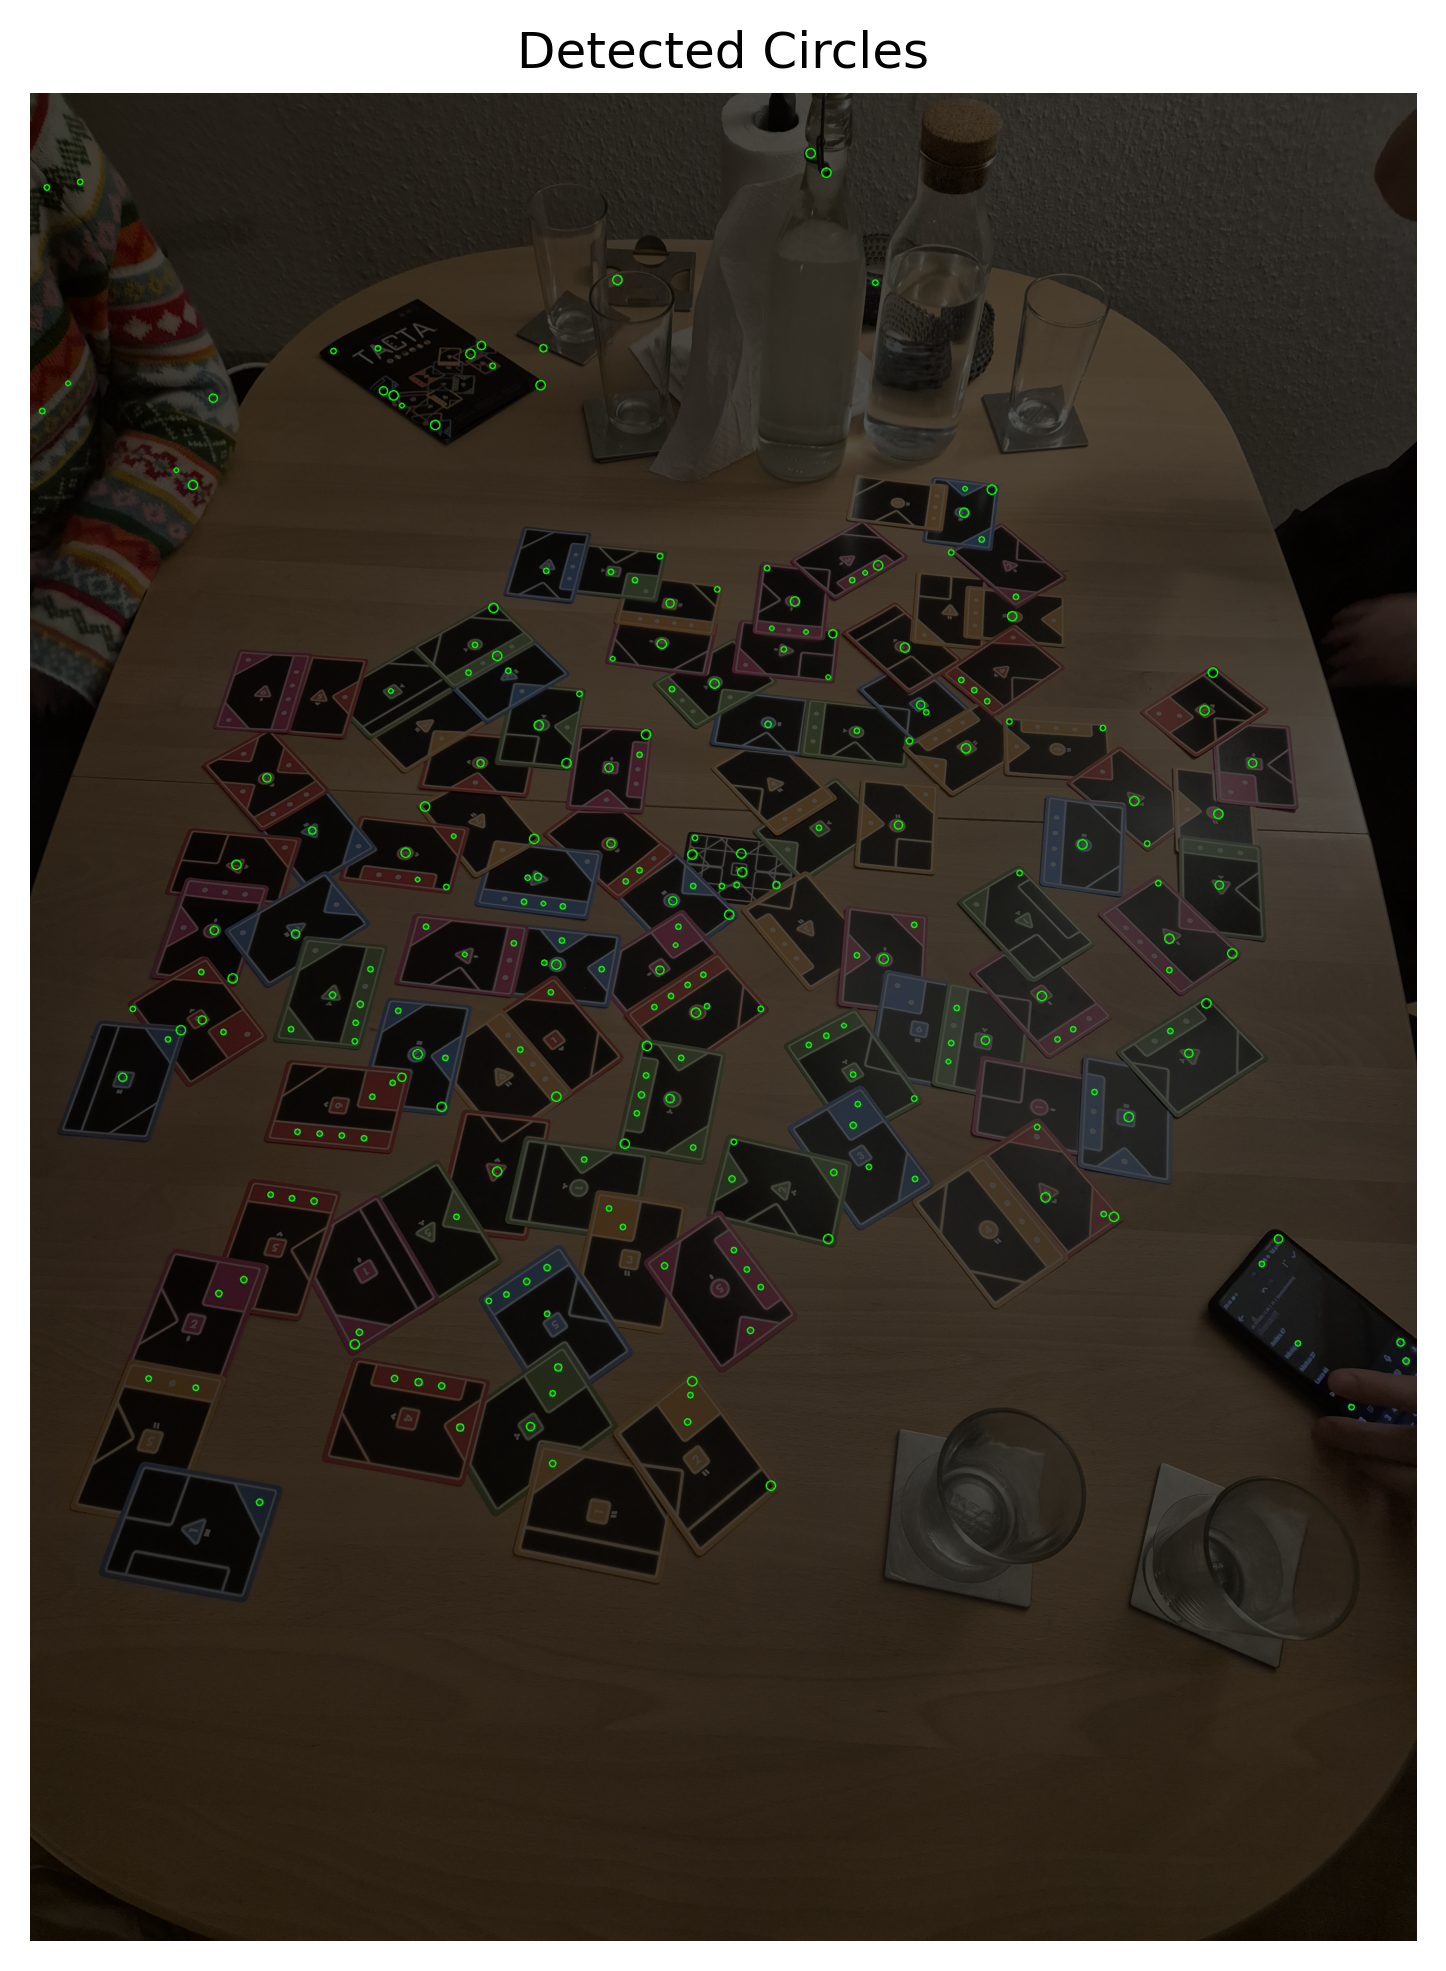

In [21]:
output = image_rgb.copy()
output = output // 3

# Detect circles
circles: list[list[tuple[int, int, int]]] = cv2.HoughCircles(
    adaptive_thresh,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,      
    param1=175,         
    param2=10,       
    minRadius=5,       
    maxRadius=11
)

# Draw only the first detected circle
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0]:
        x, y, r = circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Circle outline
    
    print(f'Detected {len(circles[0])} circles')

# Show result
plt.figure(figsize=(12, 8), dpi=300)
plt.imshow(output)
plt.axis('off')
plt.title('Detected Circles')
plt.show()

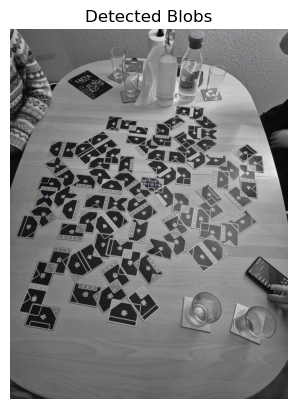

In [16]:
import cv2
import numpy as np
 
# Load image
image = cv2.imread("data/20251106_201644.jpg", cv2.IMREAD_GRAYSCALE)
 
# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()
 
# Thresholds for binarization
params.minThreshold = 10
params.maxThreshold = 200
 
# Filter by Area
params.filterByArea = True
params.minArea = 10
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs
keypoints = detector.detect(image)
 
# Draw blobs as red circles
output = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                           cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show the output
plt.imshow(output)
plt.axis('off')
plt.title('Detected Blobs')
plt.show()